# 1‑Qubit SSE: Continuous σ_z Measurement
This notebook reproduces single‑qubit trajectories using a Stochastic Schrödinger Equation (SSE) with symmetric midpoint evaluation for the observable‐weighted increment of an additive functional $Q$. You can tweak `gamma`, `T`, `N`, and the initial state.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from pathlib import Path
from quantum_measurements.sse_qubit import run_trajectory, run_ensemble, map_epsilon_to_gamma


/workspaces/Quntum-measurment-model/src/quantum_measurements/sse_qubit.py:2: SyntaxWarning: invalid escape sequence '\d'
  """


In [19]:
# Parameters
T = 1.0
N = 2000
gamma = 2.0  # measurement rate
num_traj = 10000
seed = 12345


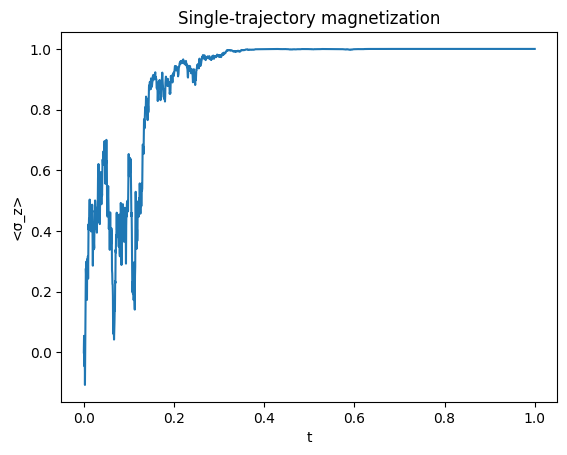

In [20]:
# Single trajectory demo
out = run_trajectory(T=T, N=N, gamma=gamma, omega=0.0, midpoint_Q=True)
plt.figure()
plt.plot(out['t'], out['m'])
plt.xlabel('t')
plt.ylabel('<σ_z>')
plt.title('Single‑trajectory magnetization')
plt.show()

In [ ]:
# Ensemble for Q distribution
Qs, ms = run_ensemble(num_traj=num_traj, T=T, N=N, gamma=gamma, seed=seed)
plt.figure()
plt.hist(Qs, bins='auto', density=True)
plt.xlabel('Q')
plt.ylabel('Density')
plt.title('Distribution of Q (midpoint symmetric)')
plt.show()

In [ ]:
# Save figures
resdir = Path('results'); resdir.mkdir(exist_ok=True)
# sample trajectories (plot 10)
plt.figure()
for k in range(min(10, ms.shape[0])):
    plt.plot(np.linspace(0, T, ms.shape[1]), ms[k], alpha=0.7)
plt.xlabel('t'); plt.ylabel('<σ_z>'); plt.title('Sample trajectories')
plt.savefig(resdir/'sample_trajectories.png', dpi=150, bbox_inches='tight')
plt.close()
# Q histogram
plt.figure()
plt.hist(Qs, bins=40, density=True)
plt.xlabel('Q'); plt.ylabel('Density'); plt.title('Distribution of Q')
plt.savefig(resdir/'q_histogram.png', dpi=150, bbox_inches='tight')
plt.close()
print('Saved results to', resdir)